In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [86]:
df= pd.read_csv('Housing_data.csv')

In [87]:
df.shape

(1047, 7)

In [88]:
df.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1047 non-null   int64  
 1   LivingArea  1047 non-null   int64  
 2   Bathrooms   1047 non-null   float64
 3   Bedrooms    1047 non-null   int64  
 4   LotSize     1047 non-null   float64
 5   Age         1047 non-null   int64  
 6   Fireplace   1047 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 57.4 KB


In [90]:
### missing_values
df.isnull().sum()

Price         0
LivingArea    0
Bathrooms     0
Bedrooms      0
LotSize       0
Age           0
Fireplace     0
dtype: int64

In [91]:
#### checking duplicates
df.duplicated().sum()

np.int64(12)

In [92]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [93]:
df.duplicated().sum()

np.int64(0)

In [94]:
### Outlier Detection
df.boxplot()

<Axes: >

In [95]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

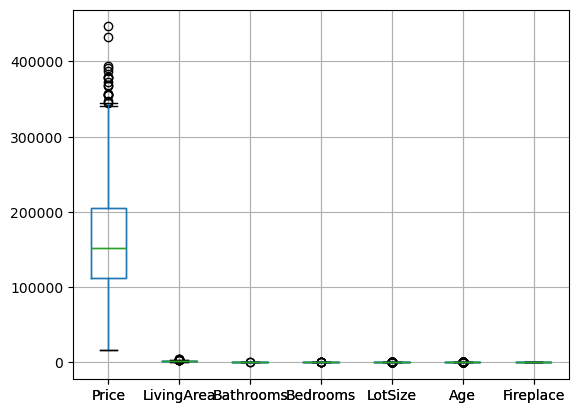

In [96]:
df.boxplot()
plt.show()

In [97]:
### Feature selection

In [98]:
df.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858.0,1629.0,1.0,3.0,0.76,75.25,0
1,26049.0,1344.0,2.0,3.0,0.92,13.00,0
2,26130.0,822.0,1.0,2.0,0.56,75.25,0
3,31113.0,1540.0,1.0,2.0,0.04,75.25,0
4,40932.0,1320.0,1.0,3.0,0.17,75.25,0


In [99]:
corr=df.corr()
import seaborn as sns

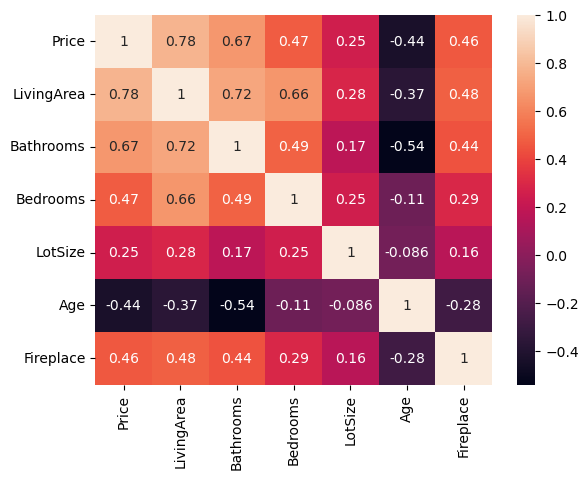

In [100]:
sns.heatmap(corr,annot=True)
plt.show()

In [101]:
#### f_regression
from sklearn.feature_selection import f_regression

In [102]:
target= df[['Price']]
features= df.drop(columns=['Price'])

In [103]:
f_reg=f_regression(features,target)

In [104]:
features.columns

Index(['LivingArea', 'Bathrooms', 'Bedrooms', 'LotSize', 'Age', 'Fireplace'], dtype='object')

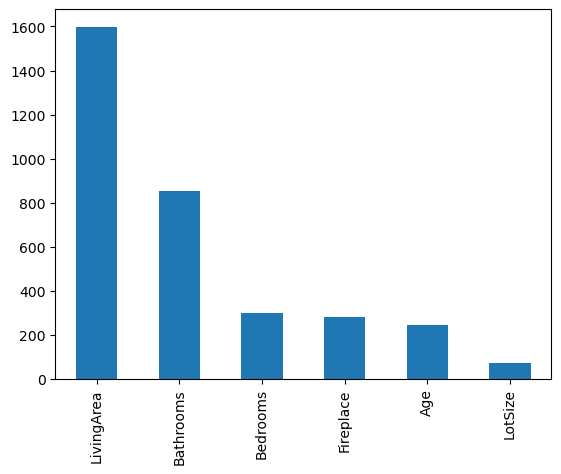

In [105]:
pd.Series(f_reg[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [106]:
1/(1-0.099)

1.1098779134295227

In [107]:
#### VIF-- Check Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
features.columns

Index(['LivingArea', 'Bathrooms', 'Bedrooms', 'LotSize', 'Age', 'Fireplace'], dtype='object')

In [109]:
features.values

array([[1.629e+03, 1.000e+00, 3.000e+00, 7.600e-01, 7.525e+01, 0.000e+00],
       [1.344e+03, 2.000e+00, 3.000e+00, 9.200e-01, 1.300e+01, 0.000e+00],
       [8.220e+02, 1.000e+00, 2.000e+00, 5.600e-01, 7.525e+01, 0.000e+00],
       ...,
       [3.361e+03, 3.500e+00, 4.000e+00, 7.100e-01, 1.000e+00, 1.000e+00],
       [3.250e+03, 2.500e+00, 3.000e+00, 5.300e-01, 2.300e+01, 1.000e+00],
       [3.467e+03, 2.500e+00, 4.000e+00, 3.400e-01, 3.000e+00, 1.000e+00]])

In [110]:
vif= pd.DataFrame()

In [111]:
vif['features']= features.columns
vif['VIF']= [variance_inflation_factor(features.values,i) for i in range(len(features.columns))]

In [112]:
vif.sort_values(by='VIF',ascending=False)

,features,VIF
2,Bedrooms,29.100456
0,LivingArea,28.393716
1,Bathrooms,21.617158
3,LotSize,3.345417
5,Fireplace,3.304989
4,Age,2.471556


In [113]:
features.drop(columns=['LotSize'],inplace=True)

In [114]:
features.head()

,LivingArea,Bathrooms,Bedrooms,Age,Fireplace
0,1629.0,1.0,3.0,75.25,0
1,1344.0,2.0,3.0,13.00,0
2,822.0,1.0,2.0,75.25,0
3,1540.0,1.0,2.0,75.25,0
4,1320.0,1.0,3.0,75.25,0


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [116]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.8,random_state=150)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(828, 5)
(207, 5)
(828, 1)
(207, 1)


In [117]:
std_sca=StandardScaler()
x_train[['LivingArea','Age']]=std_sca.fit_transform(x_train[['LivingArea','Age']]) 

In [118]:
x_test[['LivingArea','Age']]=std_sca.transform(x_test[['LivingArea','Age']]) 
#### fit--Model Learning
#### fit_transform ---Data Transformation
#### transform--- Transforming the testing data from learnable parameters of training data

In [119]:
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [120]:
lin_model.coef_

array([[41304.77404013, 19057.26110545, -7001.22063903, -5456.33655174,
        12015.91848543]])

In [121]:
lin_model.intercept_

array([141474.14688045])

In [122]:
#### Training validation
y_pred=lin_model.predict(x_train)
r2_score(y_train,y_pred)

0.6488952453480623

In [123]:
#### Testing validation
y_pred1= lin_model.predict(x_test)
r2_score(y_test,y_pred1)

0.6442282503258157

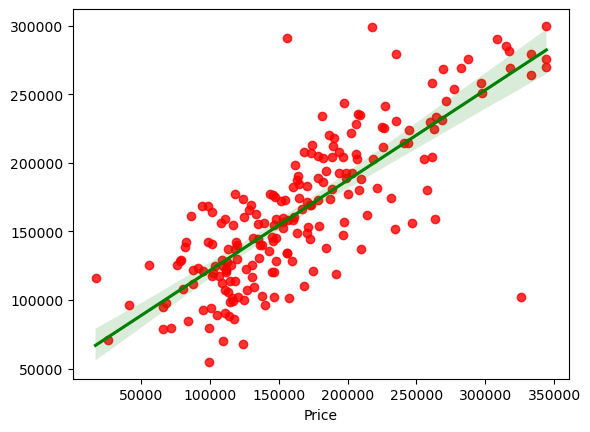

In [124]:
sns.regplot(x=y_test,y=y_pred1,scatter_kws={'color':'red'},line_kws={'color':'green'})
plt.show()

#### Error Metrics

In [125]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [132]:
#### mean_squared_error
mse=mean_squared_error(y_test,y_pred1)
mse

1554267133.2999604

In [127]:
#### mean_absolute_error
mean_absolute_error(y_test,y_pred1)

29167.184321725563

In [130]:
### mean absolute percentage error
mean_absolute_percentage_error(y_test,y_pred1)*100

23.211859955358047

In [133]:
#### Root mean squared error
np.sqrt(mse)

np.float64(39424.19477047008)